### Helical Four-Lobe Fuel Geometry 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#### Input parameters

In [10]:
rf = 1.2           # inner radius of curvature at lobe
Delta = 1.53*2.0   # Lobe thickness
r = 1.49           # outer radius of curvature at lobe
r = Delta/2.0
D = 12.6           # diameter
Rc = D / 2.0
Dv = 6.75
Rv = 3.26          # radius of curvature at valleys
d0 = 0.4           # thickness of cladding at valleys
dmax = 1.02        # thickness of cladding at end of lobes
a = 1.56           # displacer width

#### Compute coordinates of all control points

In [11]:
# coordinates at the outer surface of cladding lobe
x0 = Rc;     y0 = 0.0      

# coordinates at the connection point between valley and lobe on outer cladding surface
y1 = Delta /2.0;        x1 = Rc - (r - np.sqrt(r**2.0 - y1**2.0))  

# coordinates at the inner surface of cladding lobe
x2 = Rc - dmax;         y2 = 0.0       # 

# coordinates at the connection point between valley and lobe on inner cladding surface
y3 = Delta/2.0 - d0;   x3 = x2 - (rf - np.sqrt(rf**2.0 - y3**2.0))

d1 = (y1 - x1)/np.sqrt(2.0) # distance to the line of symmetry
d3 = (y3 - x3)/np.sqrt(2.0) # distance to the line of symmetry

L1 = np.sqrt(x1*x1 + y1*y1 - d1*d1)
L3 = np.sqrt(x3*x3 + y3*y3 - d3*d3)

L2 = Dv/2.0
L4 = L2 - d0

x4 = L2/np.sqrt(2)
y4 = x4

x5 = L4/np.sqrt(2)
y5 = x5


#### Print and plot control points

 6.300, 0.000
 4.770, 1.530
 2.386, 2.386
 5.280, 0.000
 4.484, 1.130
 2.104, 2.104


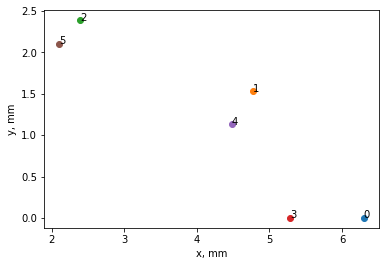

In [12]:
p0 = (x0, y0)
p1 = (x1, y1)
p2 = (x2, y2) 
p3 = (x3, y3)
p4 = (x4, y4)
p5 = (x5, y5) 

plt.figure()
plt.xlabel('x, mm')
plt.ylabel('y, mm')
for i, p in enumerate( [p0,p1,p4,p2,p3,p5] ):
    print(f"{p[0]: .3f},{p[1]: .3f}")
    plt.scatter(p[0], p[1])
    plt.text(p[0], p[1], str(i))    
    pold = p
plt.show()


#### Computer radius of curvature

In [13]:
# compute radius of curvature
d1_square = (y1 - x1)**2.0/2.0

h1 = np.sqrt( x1**2.0 + y1**2.0 - (y1 - x1)**2.0 /2.0 ) - L2

R1 = (h1**2.0 +d1_square)/(2*h1)
R1

d2_square = (y3 - x3)**2.0/2.0
h2 = np.sqrt(x3**2.0+y3**2.0 - d2_square) - L4

R2 = (h2**2.0+d2_square)/(2*h2)
print(f"{R2:.3f}")

xc1 = Rc - r
yc1 = 0
print(f"{xc1:.3f}", f"{yc1:.3f}")

xc2 = (L2 +R2) /np.sqrt(2)
yc2 = xc2
print(f"{xc2:.3f}", f"{yc2:.3f}")

3.325
4.770 0.000
4.737 4.737


In [14]:
xc1 = Rc - dmax - rf
yc1 = 0
print(f"{R1:.3f}")
print(f"{xc1:.3f}", f"{yc1:.3f}")
xc2 = (L4+R1)/np.sqrt(2)
yc2 = xc2
print(f"{xc2:.3f}", f"{yc2:.3f}")

2.970
4.080 0.000
4.204 4.204


#### Computer equivalent parameters

In [15]:
AF = 37.49 # mm^2, fuel only
AT = 63.53 # mm^2, fuel+clad
AF = 50.1 # mm^2, fuel only
AT = 71.1 # mm^2, fuel+clad

Rf = np.sqrt(AF/np.pi)
AD = a * a # mm^2, displacer
Ri = np.sqrt(AD/np.pi)
A = AF - AD

print('# Equivalent inner radius = {: .3f} mm'.format(Ri))
print('# Total Fuel Area = {A: .2f} mm^2'.format(A=AT))
print('# Fuel Area = {A: .2f} mm^2'.format(A=AF))
print('# Fuel Area (excluding displacer) = {: .2f} mm^2 '.format(A))
print('# Equivalent outer fuel radius  = {Rf: .3f} mm'.format(Rf=Rf))

Rc = np.sqrt(AT/np.pi)
print('# Equivalent outer radius  = {: .3f} mm'.format(Rc))
print('# Equivalent outer diameter  = {: .3f} mm'.format(Rc*2.0))
print('# Clad thickness (avg) = {:.3f} mm'.format(Rc - Rf))


# Equivalent inner radius =  0.880 mm
# Total Fuel Area =  71.10 mm^2
# Fuel Area =  50.10 mm^2
# Fuel Area (excluding displacer) =  47.67 mm^2 
# Equivalent outer fuel radius  =  3.993 mm
# Equivalent outer radius  =  4.757 mm
# Equivalent outer diameter  =  9.515 mm
# Clad thickness (avg) = 0.764 mm
